# Twitter Project - Data Cleaning and Analysis - LK

### Import libraries

In [1]:
import pandas as pd
import re
import string
from collections import Counter
import json

from PIL import Image
from wordcloud import WordCloud
import unicodedata
import textblob
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khory\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# import more packages for analysis

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
import statsmodels.api as sm
import statsmodels.stats.api as sms

### Cleaning and Merging the iPhone14 and iPhone14Pro DataFrames

In [3]:
# reading iPhone14 data from csv
df_raw = pd.read_csv("iPhone14_x1k.csv", index_col=0)

In [4]:
# drop duplicates
df_a = df_raw.drop_duplicates(keep="first")
df_b = df_a.copy()

In [5]:
# reading iPhone14 data from csv
dfpro_raw = pd.read_csv("iPhone14pro_x1k.csv", index_col=0)

In [6]:
# drop duplicates
dfpro_a = dfpro_raw.drop_duplicates(keep="first")
dfpro_b = dfpro_a.copy()

In [7]:
# Concatenate iPhone14 and iPhone14Pro DataFrames
df_comb = pd.concat([df_b, dfpro_b]).reset_index(drop=True)
df_comb.shape

(2000, 9)

In [8]:
df_comb.head()

,User,Tweet_time,Tweet,Hashtag,Retweet,Favorite,Join_time,Follower,Friend
0,PrasherManik,2022-09-15 02:03:03+00:00,"iPhone 12, iPhone 13 and iPhone 14 are exactly...","[{'text': 'iPhone', 'indices': [93, 100]}, {'t...",0,0,2021-04-22 11:41:31+00:00,23,562
1,MickLee93,2022-09-15 02:02:08+00:00,This is the quality content I put in @tiktok_u...,"[{'text': 'iPhone14', 'indices': [50, 59]}, {'...",0,0,2010-11-29 02:27:28+00:00,69,134
2,KraifTweets,2022-09-15 02:01:26+00:00,ANNOUNCEMENT: Verizon has started shipping iPh...,"[{'text': 'iphone14', 'indices': [109, 118]}, ...",0,0,2022-01-30 02:38:25+00:00,1558,58
3,Vedank__Panwar,2022-09-15 01:58:41+00:00,Do you call or text?\r\n#technology #iPhone #i...,"[{'text': 'technology', 'indices': [21, 32]}, ...",0,1,2020-09-30 05:07:58+00:00,63,56
4,cle0desktop,2022-09-15 01:58:15+00:00,Pure Black Blue Theme For Windows 11 \r\nGet i...,"[{'text': 'Cleodesktop', 'indices': [75, 87]},...",1,0,2013-11-17 02:01:27+00:00,34882,173


In [9]:
## create a new column to indicate tweets that are in both iPhone14 and iPhone14Pro DataFrames
df_comb["overlap"] = df_comb.duplicated(keep=False)

# drop tweets that are in both iPhone14 and iPhone14Pro DataFrames
# df_sub = df.drop_duplicates(subset=["User", "DateTime", "Tweet"], keep=False).copy()

In [10]:
# define a function to clean up the text in Tweet

def cleanup(text, remove_digits=False, stopwords=None):
    # remove elements that begin with @... or http...
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"http\S+", "", text)

    # remove RT or &amp;
    text = (
        text.replace("RT", "")
        .replace("&amp;", "")
    )

    # accent removal
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

    # remove extra newlines (often might be present in really noisy text)
    text = text.translate(text.maketrans("\n\t\r", "   "))

    # special character removal and change to lowercase
    pattern = r"[^a-zA-Z0-9\s]" if not remove_digits else r"[^a-zA-Z\s]"
    text = re.sub(pattern, "", text)
    text = text.lower()

    # stopword removal
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words("english")
        stopwords2 = nltk.corpus.stopwords.words("german")
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if (token not in stopwords) and (token not in stopwords2)]
    filtered_text = " ".join(filtered_tokens)

    # remove extra whitespace
    filtered_text = re.sub(" +", " ", filtered_text)
    filtered_text = filtered_text.strip()
    return filtered_text

In [11]:
# define the function to return the list with "n" most common words in Tweet

def tweet_words(n, df_in):

    # combine the text of all tweets
    combitext = " ".join(df_in["Tweet"].values)

    # clean up the combined text
    cleantext = cleanup(combitext, remove_digits=True)

    # show the list with "n" most common words
    return Counter(cleantext.split()).most_common(n)

In [12]:
# define the function to return the sentiment in Tweet

def tweet_sentiment(df_in):

    # combine the text of all tweets
    combitext = " ".join(df_in["Tweet"].values)

    # clean up the combined text
    cleantext = cleanup(combitext, remove_digits=True)

    # show the sentiment of the combined text
    return textblob.TextBlob(cleantext).sentiment

In [13]:
df_sub = df_comb.copy()

In [14]:
df_sub.describe()

,Retweet,Favorite,Follower,Friend
count,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,1.134000,10.316500,3.130892e+04,916.678500
std,14.321473,120.045624,4.846429e+05,4066.409153
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,1.300000e+01,33.750000
50%,0.000000,0.000000,1.435000e+02,142.000000
75%,0.000000,1.000000,1.019250e+03,621.000000
max,573.000000,4598.000000,1.454497e+07,147074.000000


In [15]:
##################################################################################
# Look at common words and sentiment from tweets that satisfy certain conditions, 
# such as the number of retweets and the number of followers of the tweeters
##################################################################################

df_input = df_sub[df_sub["Retweet"] > 5]
tweet_sentiment(df_input)

Sentiment(polarity=0.10644108495670995, subjectivity=0.49890083874458874)

In [16]:
tweet_words(15, df_input)

[('iphone', 57),
 ('iphonepro', 27),
 ('pro', 16),
 ('apple', 11),
 ('news', 8),
 ('first', 7),
 ('new', 6),
 ('ios', 5),
 ('good', 5),
 ('iphonepromax', 4),
 ('bad', 4),
 ('performance', 4),
 ('despite', 4),
 ('using', 4),
 ('gen', 4)]

In [17]:
df_input = df_sub[df_sub["Follower"] > 100]
tweet_sentiment(df_input)

Sentiment(polarity=0.19539037178916038, subjectivity=0.4882308078979234)

In [18]:
tweet_words(15, df_input)

[('iphone', 1524),
 ('iphonepro', 699),
 ('apple', 423),
 ('ios', 294),
 ('pro', 261),
 ('iphonepromax', 222),
 ('new', 167),
 ('appleevent', 119),
 ('screen', 108),
 ('max', 89),
 ('get', 84),
 ('whitestone', 78),
 ('iphoneplus', 75),
 ('island', 69),
 ('phone', 66)]

In [19]:
df_input = df_sub[df_sub["Friend"] > 2000]
tweet_sentiment(df_input)

Sentiment(polarity=0.28470331566416973, subjectivity=0.5412195850807948)

In [20]:
tweet_words(10, df_input)

[('iphone', 360),
 ('iphonepro', 93),
 ('apple', 79),
 ('screen', 64),
 ('whitestone', 64),
 ('appleevent', 52),
 ('pro', 46),
 ('ios', 39),
 ('want', 38),
 ('hay', 35)]

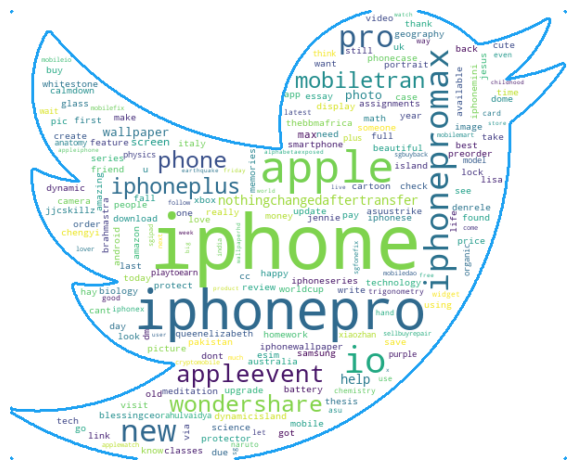

In [21]:
# combine the text of all tweets
combitext = " ".join(df_sub["Tweet"].values)

# clean up the combined text
cleantext = cleanup(combitext, remove_digits=True)

 # import image to np.array
tmask = np.array(Image.open("twitter_mask.png"))

plt.figure()
wordcloud_t = WordCloud(collocations=False, mask=tmask, background_color="white", contour_color="#1DA1F2",contour_width=3).generate(cleantext)
plt.imshow(wordcloud_t, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

In [22]:
# compare the sentiment for iPhone14 and iPhone14pro

tweet_sentiment(df_b)

Sentiment(polarity=0.25268883263604935, subjectivity=0.49536891043129205)

In [23]:
tweet_sentiment(dfpro_b)

Sentiment(polarity=0.19405538639442635, subjectivity=0.49899874459634636)

In [24]:
tweet_sentiment(df_sub)

Sentiment(polarity=0.22437099224148502, subjectivity=0.4971219894524616)

In [25]:
# conduct analysis based on characteristics of tweets and tweeters

df_stat = df_sub.copy()
df_stat2 = df_stat.drop_duplicates(keep="first").reset_index(drop=True).copy()

# change column name to lowercase
df_stat2.columns = map(str.lower, df_stat2.columns)

In [26]:
# length of tweet
df_stat2["length"] = df_stat2["tweet"].apply(len)

# number of emoticons
df_stat2["emo"] = df_stat2["tweet"].apply(
    lambda x: re.findall("[\U0001f600-\U0001f650]", x)
)
df_stat2["emoticon"] = df_stat2["emo"].apply(len)

# joined years
df_stat2["use_history"] = df_stat2["join_time"].apply(lambda x: 2022 - int(x[0:4]))

In [27]:
# sentiment of each tweet
df_stat2["polarity"] = df_stat2["tweet"].apply(lambda row: textblob.TextBlob(row).sentiment.polarity)
df_stat2["subjectivity"] = df_stat2["tweet"].apply(lambda row: textblob.TextBlob(row).sentiment.subjectivity)

In [28]:
df_stat2.describe()

,retweet,favorite,follower,friend,length,emoticon,use_history,polarity,subjectivity
count,1826.000000,1826.000000,1.826000e+03,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,1.208105,11.136364,3.344180e+04,933.491238,197.420591,0.173056,5.059693,0.190606,0.378542
std,14.983003,125.603453,5.069996e+05,4176.796740,83.110130,0.602876,4.818372,0.286321,0.299596
min,0.000000,0.000000,0.000000e+00,0.000000,26.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,1.400000e+01,33.000000,123.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.450000e+02,147.000000,198.500000,0.000000,3.000000,0.136364,0.387500
75%,0.000000,1.000000,1.019000e+03,654.750000,279.000000,0.000000,10.000000,0.350000,0.571429
max,573.000000,4598.000000,1.454497e+07,147074.000000,408.000000,8.000000,16.000000,1.000000,1.000000


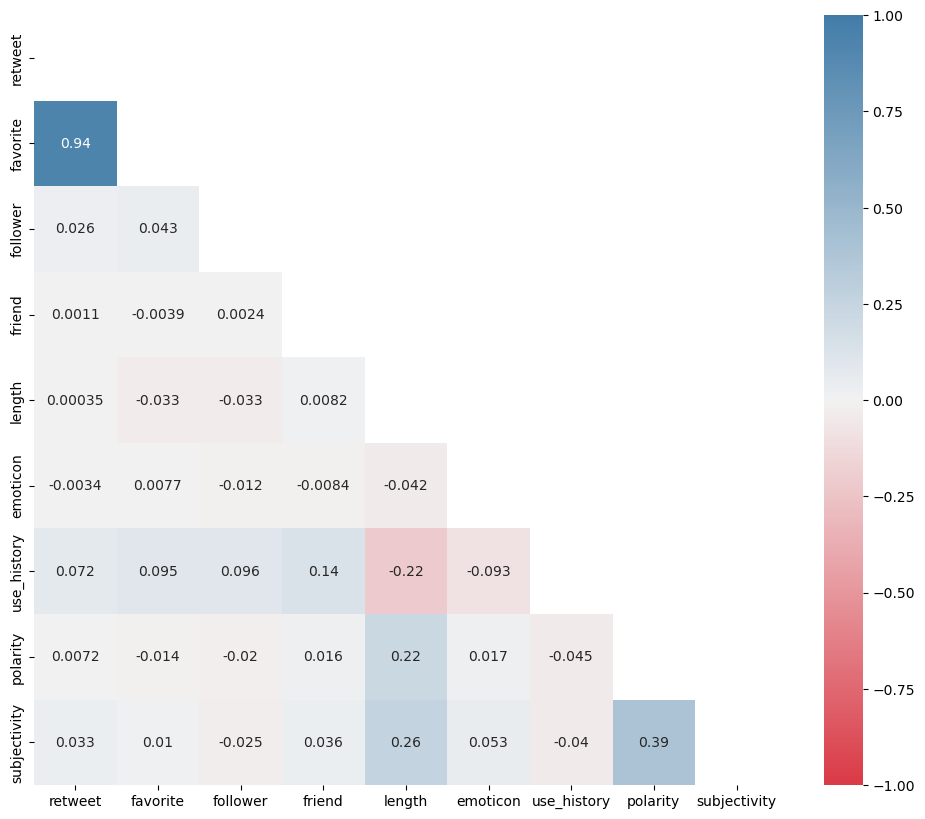

In [29]:
corr = df_stat2[
    [
        "retweet",
        "favorite",
        "follower",
        "friend",
        "length",
        "emoticon",
        "use_history",
        "polarity",
        "subjectivity",
    ]
].corr()

fig, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap=cmap, annot=True)
plt.show()

As shown in the heatmap above, based on the tweets about #iPhone14 and #iPhone14Pro, the following correlations are observed:
- The tweets from tweeters with longer history on Twitter are retweeted and favorited more often.
- These tweeters also have more followers and friends but their tweets tend to be shorter and with less emoticons.
- The tweets with more "positive" sentiment tend to be longer and are more subjective.


In [30]:
# Poisson regression model on the number of retweets

Y = df_stat2[["retweet"]]
X = df_stat2[
    ["favorite", "follower", "friend", "length", "emoticon", "use_history", "polarity"]
]
X = sm.add_constant(X)

results = sm.GLM(Y, X, family=sm.families.Poisson()).fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                retweet   No. Observations:                 1826
Model:                            GLM   Df Residuals:                     1818
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4266.7
Date:                Fri, 16 Dec 2022   Deviance:                       7638.6
Time:                        17:08:31   Pearson chi2:                 5.56e+04
No. Iterations:                    11   Pseudo R-squ. (CS):             0.9890
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9879      0.087    -11.358      

### Summary

Based on the polarity from the sentiment analysis, both the tweets for #iPhone14 and #iPhone14pro are positive on average, with the sentiment for #iPhone14 (+0.25) being slightly more positive than the sentiment for #iPhone14Pro (+0.19).

The combined sentiment for both is also positive (+0.22), but if we focus on only posts with more than 5 retweets, then the positive sentiment is much lower at +0.10. The tweets by tweeters with more followers are also less positive on average. 

Using Poisson regression model on the number of retweets for tweets about #iPhone14 and #iPhone14Pro, the number of retweets increases when the tweets are by tweeters with higher number of followers and longer history of using Twitter. The number also goes up with the use of emoticons in the tweets and the number of favories received by the tweets.